# IDS Assignment 1
Document your results as well as the way you obtained them in this jupyter notebook. A seperate report (pdf, word etc.) is _not_ required. However, it is necessary that you provide the python code leading to your results as well as textual answers to the assignment questions in this notebook. 

Do not change the general structure of this notebook, but you can add further markdown or code cells to explain your solutions if necessary. In the end, submit this file in moodle.

## Get to know the data

### Question 1 (Indicating type): 
1. Identify precise type of each attribute. Note that the right answers are like: “numerical-continuous-ratio”, just Numerical or Categorical is not enough.

<table>
    <tr>
        <th>Attribute</th>
        <th>Attribute Type</th>
    </tr>
    <tr>
        <td>Age</td>
        <td>Numerical-Discrete</td>
    </tr>
    <tr>
        <td>Workclass</td>
        <td>Categorical-Nominal</td>
    </tr>
    <tr>
        <td>Education</td>
        <td>Categorical-Ordinal</td>
   </tr>
    <tr>
        <td>Education Num</td>
        <td>Numerical-Discrete</td>
    </tr>
    <tr>
        <td>Marital Status</td>
        <td>Categorical-Nominal</td>
    </tr>
    <tr>
        <td>Occupation</td>
        <td>Categorical-Nominal</td>
    </tr>
    <tr>
        <td>Relationship</td>
        <td>Categorical-Nominal</td>
    </tr>
    <tr>
        <td>Race</td>
        <td>Categorical-Nominal</td>
    </tr>
    <tr>
        <td>Sex</td>
        <td>Categorical-Nominal</td>
    </tr>
    <tr>
        <td>Hours per Week</td>
        <td>Numerical-Continuous-Ratio data</td>
    </tr>
    <tr>
        <td>Native Country</td>
        <td>Categorical-Nominal</td>
    </tr>
    
    
</table>


### Question 2 (Removing outliers):
2. (a) Explore into "age" and "hours-per-week" and identify outliers (Boxplot returns whiskers). After identifying outliers, remove them (do it just once on the data set). Now you should have two data sets (cleaned and original).

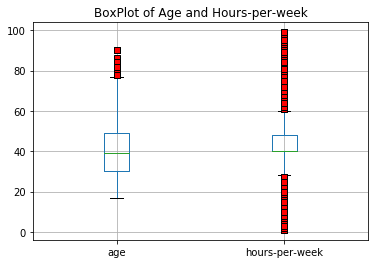

In [1]:
# My code
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#function for removing Outliers
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

#function for loading the CSV file
data1 = pd.read_csv('C:/Users/Samuel Roy/Introduction to Data Science Notebooks/Assignment/adult.data-3.csv')

#Creating Data Frame
df = pd.DataFrame(data1,columns=['age','workclass','education','education-num','marital-status','occupation','relationship','race','sex','hours-per-week','native-country','sex','label'])

#Plotting boxplot
red_square = dict(markerfacecolor='r', marker='s')
fig5, ax5 = plt.subplots()
ax5.set_title('BoxPlot of Age and Hours-per-week')
df.boxplot(column=['age','hours-per-week'],flierprops=red_square) 


df1= pd.DataFrame(data1,columns=['age'])
df2= pd.DataFrame(data1,columns=['hours-per-week'])

data_filtered_age = remove_outlier(df1,'age')
#print(data_filtered_age)

data_filtered_hoursperweek = remove_outlier(df2,'hours-per-week')
#print(data_filtered_hoursperweek)

2. (b) Draw Boxplot of the cleaned data set for "hours-per-week". Is there still any outlier? If so, explain why?

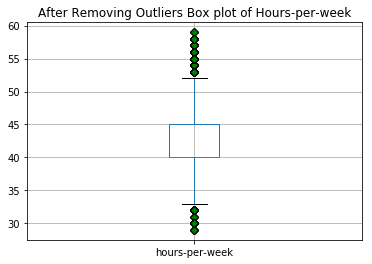

In [2]:
#Plotting boxplot for Hours-per-week
fig5, ax5 = plt.subplots()
green_diamond = dict(markerfacecolor='g', marker='D')
ax5.set_title('After Removing Outliers Box plot of Hours-per-week')
data_filtered_hoursperweek.boxplot(flierprops=green_diamond)
plt.show()


Explanation:
- Yes, outliers after cleaning indicate that there still exists outliers for the dataset that is obtained after cleaning. The Quartile 1 and Quartile 3 and interquartile range is recalculated, so new outliers appear at smaller range. Repeated cleaning may be required to remove them.

### Question 3 (Basic visualization):
3. (a) Visualize mean and median of "age", and "hours-per-week" per "sex" by separate plots for the cleaned and the original data sets (there should be 8 plots, 4 plots for the original data set and 4 plots for the cleaned data set). 

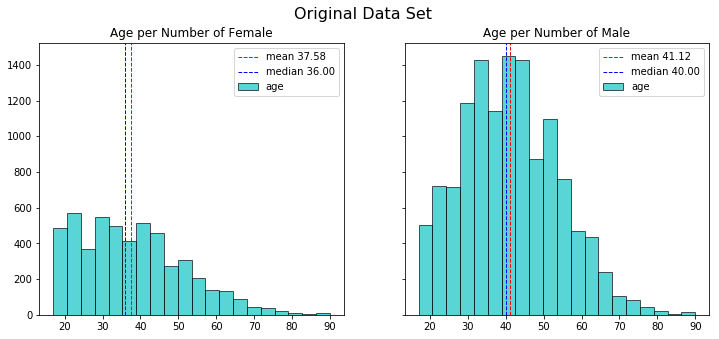

C:\Users\Samuel Roy\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\Samuel Roy\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


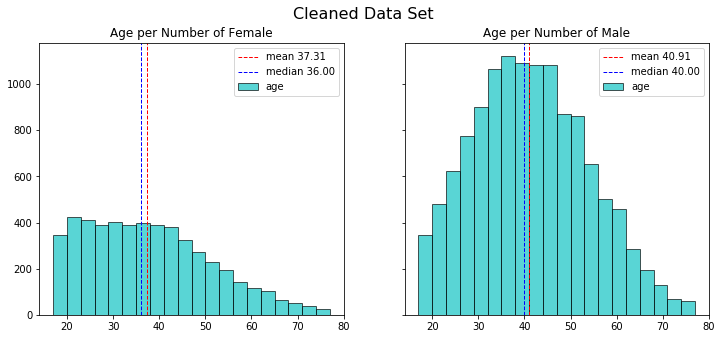

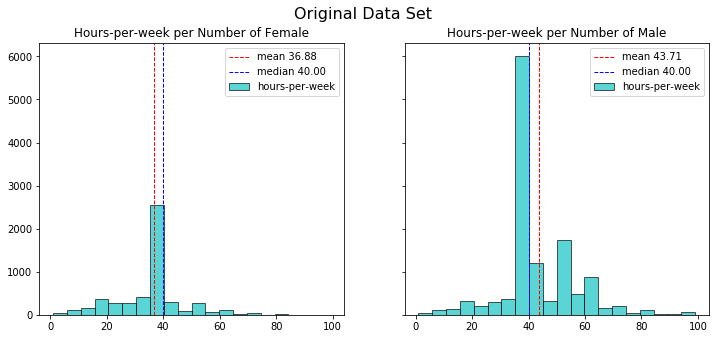

C:\Users\Samuel Roy\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:68: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\Samuel Roy\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:76: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


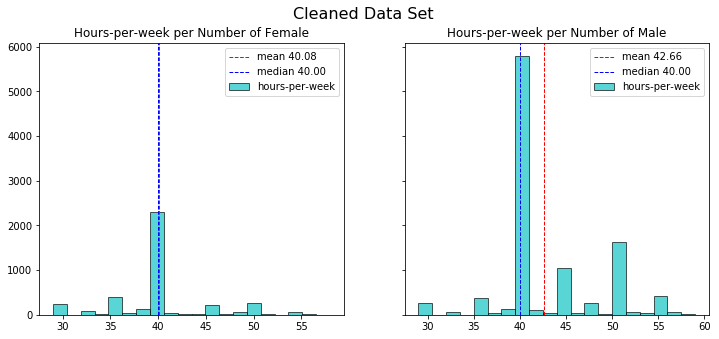

In [3]:
# Age per Female plot (Original data set)
df = pd.DataFrame(data1,columns=['age','hours-per-week','sex'])
fig, axes = plt.subplots(ncols=2, figsize=(12, 5), sharey=True)
femaleage=df[df['sex']=='Female']['age']
axes[0].hist(femaleage, bins=20, color='c', edgecolor='k', alpha=0.65)
axes[0].axvline(femaleage.mean(), color='red', linestyle='dashed', linewidth=1, label= ("%s %.2f" % ('mean',femaleage.mean())))
axes[0].axvline(femaleage.median(), color='blue', linestyle='dashed', linewidth=1, label= ("%s %.2f" % ('median',femaleage.median())))
axes[0].legend()
axes[0].set_title('Age per Number of Female')

# Age per Male plot (Original data set)
maleage=df[df['sex']=='Male']['age']
axes[1].hist(maleage, bins=20, color='c', edgecolor='k', alpha=0.65)
axes[1].axvline(maleage.mean(), color='red', linestyle='dashed', linewidth=1 , label= ("%s %.2f" % ('mean',maleage.mean())))
axes[1].axvline(maleage.median(), color='blue', linestyle='dashed', linewidth=1, label= ("%s %.2f" % ('median',maleage.median())))
axes[1].legend()
axes[1].set_title('Age per Number of Male')
fig.suptitle('Original Data Set', fontsize=16)

plt.show()
fig, axes = plt.subplots(ncols=2, figsize=(12, 5), sharey=True)

# Age per Female plot (Cleaned data set)
femaleage=data_filtered_age[df['sex']=='Female']['age']
axes[0].hist(femaleage, bins=20, color='c', edgecolor='k', alpha=0.65)
axes[0].axvline(femaleage.mean(), color='red', linestyle='dashed', linewidth=1 , label= ("%s %.2f" % ('mean',femaleage.mean())))
axes[0].axvline(femaleage.median(), color='blue', linestyle='dashed', linewidth=1, label= ("%s %.2f" % ('median',femaleage.median())))
axes[0].legend()
axes[0].set_title('Age per Number of Female')

# Age per Male plot (Cleaned data set)
maleage=data_filtered_age[df['sex']=='Male']['age']
axes[1].hist(maleage, bins=20, color='c', edgecolor='k', alpha=0.65)
axes[1].axvline(maleage.mean(), color='red', linestyle='dashed', linewidth=1 , label= ("%s %.2f" % ('mean',maleage.mean())))
axes[1].axvline(maleage.median(), color='blue', linestyle='dashed', linewidth=1, label= ("%s %.2f" % ('median',maleage.median())))
axes[1].legend()
axes[1].set_title('Age per Number of Male')
fig.suptitle('Cleaned Data Set', fontsize=16)

plt.show()


# Hours-per-week per Female plot (Original data set)
fig, axes = plt.subplots(ncols=2, figsize=(12, 5), sharey=True)

femalehours=df[df['sex']=='Female']['hours-per-week']
axes[0].hist(femalehours, bins=20, color='c', edgecolor='k', alpha=0.65)
axes[0].axvline(femalehours.mean(), color='red', linestyle='dashed', linewidth=1, label= ("%s %.2f" % ('mean',femalehours.mean())))
axes[0].axvline(femalehours.median(), color='blue', linestyle='dashed', linewidth=1, label= ("%s %.2f" % ('median',femalehours.median())))
axes[0].legend()
axes[0].set_title('Hours-per-week per Number of Female')

# Hours-per-week per Male plot (Original data set)
malehours=df[df['sex']=='Male']['hours-per-week']
axes[1].hist(malehours, bins=20, color='c', edgecolor='k', alpha=0.65)
axes[1].axvline(malehours.mean(), color='red', linestyle='dashed', linewidth=1, label= ("%s %.2f" % ('mean',malehours.mean())))
axes[1].axvline(malehours.median(), color='blue', linestyle='dashed', linewidth=1, label= ("%s %.2f" % ('median',malehours.median())))
axes[1].legend()
axes[1].set_title('Hours-per-week per Number of Male')
fig.suptitle('Original Data Set', fontsize=16)

plt.show()


# Hours-per-week per Female plot (Cleaned data set)
fig, axes = plt.subplots(ncols=2, figsize=(12, 5), sharey=True)

female_hourperweek=data_filtered_hoursperweek[df['sex']=='Female']['hours-per-week']
axes[0].hist(female_hourperweek, bins=20, color='c', edgecolor='k', alpha=0.65)
axes[0].axvline(female_hourperweek.mean(), color='red', linestyle='dashed', linewidth=1, label= ("%s %.2f" % ('mean',female_hourperweek.mean())))
axes[0].axvline(female_hourperweek.median(), color='blue', linestyle='dashed', linewidth=1, label= ("%s %.2f" % ('median',female_hourperweek.median())))
axes[0].legend()
axes[0].set_title('Hours-per-week per Number of Female')

# Hours-per-week per Male plot (Cleaned data set)
male_hourperweek=data_filtered_hoursperweek[df['sex']=='Male']['hours-per-week']
axes[1].hist(male_hourperweek, bins=20, color='c', edgecolor='k', alpha=0.65)
axes[1].axvline(male_hourperweek.mean(), color='red', linestyle='dashed', linewidth=1, label= ("%s %.2f" % ('mean',male_hourperweek.mean())))
axes[1].axvline(male_hourperweek.median(), color='blue', linestyle='dashed', linewidth=1, label= ("%s %.2f" % ('median',male_hourperweek.median())))
axes[1].legend()
axes[1].set_title('Hours-per-week per Number of Male')
fig.suptitle('Cleaned Data Set', fontsize=16)

plt.show()


3. (b) Explain how mean and median of "age" per "sex" change when you remove the outliers.

Explanation: 
- The removal of outliers has no effect on the median as the median is calculated from the middle value. Remove an outlier,the median will move to the new middle value. Assuming most of the other middle values are relatively similar, then changing from one middle data point to the nearest one doesn’t make much of a difference.
- Where as mean is more affected by outliers because it incorporates the actual numerical value of the outlier. In case of Age per sex as we are removing the outlier values which are larger than mean, so mean is dropping in value. 

### Question 4 (Distribution):
4. (a) Explore into distribution of "age" in the original data set. Does it have any well-known distribution (normal, uniform, skewed, ...)? If so, what are the main statistical features (mean, median, and mode) of this specific type of distribution.

C:\Users\Samuel Roy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


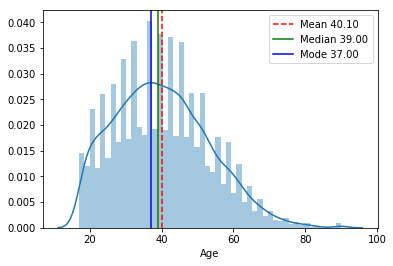

In [4]:
mean=df['age'].mean()
median=df['age'].median()
mode=df['age'].mode().get_values()[0]

f, (ax_hist) = plt.subplots(1, sharex=True)



sns.distplot(df["age"], ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')
ax_hist.axvline(mode, color='b', linestyle='-')

plt.legend({("%s %.2f" % ('Mean',mean)):mean,("%s %.2f" % ('Median',median)):median,("%s %.2f" % ('Mode',mode)):mode})

ax_hist.set(xlabel='Age')
plt.show()

Explanation: 
- It has a right skewed distribution.(Also known as positive skew) 
- Its Mode will be the highest peak.
- Its Median is to the right of Mode 
- Mean is to the right of Median.(This implies Mean is the greatest.
- Median is closer to the first quartile than to third quartile as can be seen in the boxplot in question 2.)


4. (b) Explore into distribution of "age" and "hours-per-week" together. Explain how the data is distributed with respect to these two attributes in the original data sets (using Jointplot)?


C:\Users\Samuel Roy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


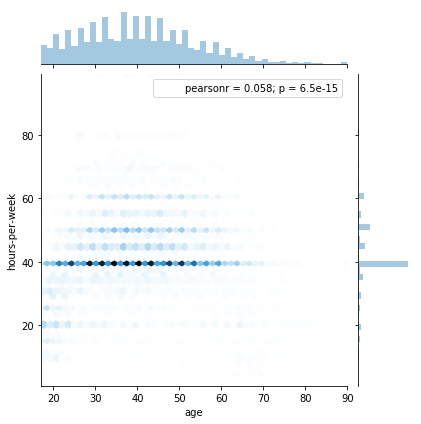

In [5]:
#convert Numpy to Dataframe with specific names for columns 
df3 = pd.DataFrame(data1, columns=["age", "hours-per-week"])

sns.jointplot(x="age", y="hours-per-week", data=df, kind="hex");  


Explanation:
- The distribution of age is bellcurved but not symmetric. So it is right skewed, since a sharp decrease is seen after the age of 50. The peak is seen between 30 and 40.
- The distribution of hours-per-week is a Mutimodal but clearly seperated.  Employees across the age group 20 to 60, work for 40 hours per week

## Building models to perform predictions

### Question 5 (Decision Tree):
5. (a) Consider all the categorical attributes except label as descriptive features and label (income) as target feature. Make two decision trees (one based on Entropy and another based on Gini).

In [6]:
# Importing and initializing the categorical dataset

from DecisionTree import DecisionTree
import pandas as pd

fields = ['workclass','education','marital-status', 'occupation','relationship','race','sex','native-country','label']
#Reading CSV file as data set by Pandas
data = pd.read_csv('C:/Users/Samuel Roy/Introduction to Data Science Notebooks/Assignment/adult.data-3.csv',skipinitialspace=True,usecols=fields)
columns = data.columns

#All columns except the last one are descriptive by default
descriptive_features = columns[:-1]
#The last column is considered as label
label = columns[-1]

#Converting all the columns to string 
for column in columns:
    data[column]= data[column].astype(str)
   
data_descriptive = data[descriptive_features].values
data_label = data[label].values



###### Entrophy Based Decision Tree:

In [7]:

#Calling DecisionTree constructor (the last parameter is criterion which can also be "gini")
decisionTree = DecisionTree(data_descriptive.tolist(), descriptive_features.tolist(), data_label.tolist(), "entropy")

#Here you can pass pruning features (gain_threshold and minimum_samples)
decisionTree.id3(0,0)

#Visualizing decision tree by Graphviz
decisionTree.print_visualTree()

print("System entropy: ", format(decisionTree.entropy))
print("System gini: ", format(decisionTree.gini))

System entropy:  0.9894104774720454
System gini:  None


###### Gini Based Decision Tree:

In [8]:

#Calling DecisionTree constructor (the last parameter is criterion which can also be "gini")
decisionTree = DecisionTree(data_descriptive.tolist(), descriptive_features.tolist(), data_label.tolist(), "gini")

#Here you can pass pruning features (gain_threshold and minimum_samples)
decisionTree.id3(0,0)

#Visualizing decision tree by Graphviz
decisionTree.print_visualTree()


print("System entropy: ", format(decisionTree.entropy))
print("System gini: ", format(decisionTree.gini))

System entropy:  None
System gini:  0.49267787898095206


5. (b) What are the best attributes (based on Gini and Entropy) for splitting the trees in the third round of ID3?   

Explanation:
- Based on Gini and Entropy the best attributes for splitting the trees in the third round of ID3 is <b>Occupation</b>.

5. (c) Prune the tree which is made based on Entropy by 7000 as minimum number of samples. Identify which value of the first node/attribute is chosen to be split in the second round of ID3 and explain why?

In [9]:
#Calling DecisionTree constructor (the last parameter is criterion which can also be "gini")
decisionTree = DecisionTree(data_descriptive.tolist(), descriptive_features.tolist(), data_label.tolist(), "entropy")

#Here you can pass pruning features (gain_threshold and minimum_samples)
decisionTree.id3(0,7000)

#Visualizing decision tree by Graphviz
decisionTree.print_visualTree()

print("System entropy: ", format(decisionTree.entropy))
print("System gini: ", format(decisionTree.gini))

System entropy:  0.9894104774720454
System gini:  None


Explanation:

- The value <b>Husband</b> of the first node is chosen to be split in the second round of ID3 algorithm. 

### Question 6 (Regression):

6. (a) Create two sets of independent variables (1) and (2)

In [10]:
import pandas as pd

fields3 = ['workclass','education-num','marital-status', 'occupation','relationship','race','sex','hours-per-week','native-country']
field1=['age','marital-status','sex']
field2=['workclass','education-num','hours-per-week']

#Reading CSV file as data set by Pandas
data_1 = pd.read_csv(r'C:/Users/Samuel Roy/Introduction to Data Science Notebooks/Assignment/adult.data-3.csv',skipinitialspace=True,usecols=field1)
df1 = pd.DataFrame(data_1)
columns_1 = data_1.columns

data_2 = pd.read_csv(r'C:/Users/Samuel Roy/Introduction to Data Science Notebooks/Assignment/adult.data-3.csv',skipinitialspace=True,usecols=field2)
columns_2 = data_2.columns
df2 = pd.DataFrame(data_2)

data_3 = pd.read_csv(r'C:/Users/Samuel Roy/Introduction to Data Science Notebooks/Assignment/adult.data-3.csv',skipinitialspace=True,usecols=fields3)
columns_3 = data_3.columns
df3 = pd.DataFrame(data_3)

target_feature_field=['label']
target_feature = pd.read_csv(r'C:/Users/Samuel Roy/Introduction to Data Science Notebooks/Assignment/adult.data-3.csv',skipinitialspace=True,usecols=target_feature_field)
target_feature_columns = target_feature.columns



6. (b) Which attributes are suitable as an input for the logistic regression and which need to be modified first? Why? 

Explanation:
- The suitable attribute as input for the logistic regression are all the Numerical attributes: 
<b>'age','education-num', 'hours-per-week'</b>
- All the Non-numerical attributes need to be modified first(One hot encoding):
<b>'workclass','marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'</b>
- The logistic regression takes in only the numerical values

In [11]:
# One hot table transformation
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

def makeOneHotTable(df_in):
            le = LabelEncoder()
            # encode labels with value between 0 and n_classes-1.
            train2 = df_in.apply(le.fit_transform)
            train2.head()
            encoder = OneHotEncoder(categories='auto')
            encoder.fit(train2)
            onehotlabel = encoder.transform(train2).toarray()
            return onehotlabel
        
    

#onehotlabels_DataSet1
onehotlabels_DataSet1 = df1[['age','marital-status','sex']]
onehotlabels_DataSet1 = makeOneHotTable(onehotlabels_DataSet1)

#onehotlabels_DataSet2
onehotlabels_DataSet2 = df2[['workclass','education-num','hours-per-week']]
onehotlabels_DataSet2 = makeOneHotTable(onehotlabels_DataSet2)


#onehotlabels_DataSet3
onehotlabels_DataSet3 = df3[columns_3]
onehotlabels_DataSet3 = makeOneHotTable(onehotlabels_DataSet3)



6. (c) Train three logistic regression classifiers based on the two created data sets as well as the initial data set:

 # Logistic regression classifiers on Data Set 1

In [12]:
import matplotlib.pyplot as plt
import sklearn.metrics as metric
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

X1 = onehotlabels_DataSet1
y =  target_feature.iloc[:,-1]

classifier1 = LogisticRegression( solver = 'liblinear', multi_class = 'ovr')

classifier1.fit(X1, y.ravel())
y_pred1 = classifier1.predict(X1)


print(classification_report(y,y_pred1))

accuracy_1=metric.accuracy_score(np.array(y).flatten(), np.array(y_pred1).flatten(), normalize=True)
print('Data Set 1 accuracy=',accuracy_1) 

              precision    recall  f1-score   support

       <=50K       0.83      0.71      0.77     10000
        >50K       0.69      0.81      0.75      7841

   micro avg       0.76      0.76      0.76     17841
   macro avg       0.76      0.76      0.76     17841
weighted avg       0.77      0.76      0.76     17841

Data Set 1 accuracy= 0.758309511798666


# Logistic regression classifiers on Data Set 2

In [13]:
X2 = onehotlabels_DataSet2

classifier2 = LogisticRegression( solver = 'liblinear', multi_class = 'ovr')

classifier2.fit(X2, y.ravel())
y_pred2 = classifier2.predict(X2)

print(classification_report(y,y_pred2))

accuracy_2 = metric.accuracy_score(np.array(y).flatten(), np.array(y_pred2).flatten(), normalize=True)
print('Data Set 2 accuracy=',accuracy_2) 

              precision    recall  f1-score   support

       <=50K       0.72      0.79      0.75     10000
        >50K       0.70      0.60      0.65      7841

   micro avg       0.71      0.71      0.71     17841
   macro avg       0.71      0.70      0.70     17841
weighted avg       0.71      0.71      0.71     17841

Data Set 2 accuracy= 0.7098256824169049


# Logistic regression classifiers on all data set

In [14]:
X3 = onehotlabels_DataSet3

classifier3 = LogisticRegression( solver = 'liblinear', multi_class = 'ovr')
 
classifier3.fit(X3, y.ravel())
y_pred3 = classifier3.predict(X3)

print(classification_report(y,y_pred3))

accuracy_3 = metric.accuracy_score(np.array(y).flatten(), np.array(y_pred3).flatten(), normalize=True)
print('Data Set 3 accuracy=',accuracy_3) 


              precision    recall  f1-score   support

       <=50K       0.84      0.80      0.82     10000
        >50K       0.76      0.81      0.78      7841

   micro avg       0.80      0.80      0.80     17841
   macro avg       0.80      0.80      0.80     17841
weighted avg       0.81      0.80      0.81     17841

Data Set 3 accuracy= 0.8046073650580124


6. (d) Interpret the three resulting models and compare them. Which model do you recommend and why?

Explanation: 
- In the resulting model, Model 3 with all Dataset  is better. 
- F1-score of Model 3 with all Dataset is highest with almost 0.80 for all criteria.
-  F1 score is the measure of test's accuracy which takes into account both recall and precision. Taking F1-score as the metric for comparision.
- Accuracy of Model 3 is the highest.

### Question 7 (Neural Networks)

7. (a) What are the inputs of your network?

Explanation: 
- All attributes except label and education(as education-num is already considered) can be used as the input
- Numerical and categorical values can be used in input of Neural Network.
- Categorical values should be converted using one hot encoding.

7. (b) What are the possible number of input pattern for your network (just including categorical attributes)?

Explanation:
- There are 10 possible inputs. Considering that inputs have binary pattern there should be 2^n input patterns, where n is the the number of inputs.  But here there are Categorical values.
-  The dataset returned from one-hot-encoding has 193 columns which implies it has nearly 2^193 inputs (from OneHotEncoder of scikit)

7. (c.i) First, with default parameters and return the parameters.

In [15]:
# With Default parameters and Return parameters
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
dataset = pd.read_csv(r'C:/Users/Samuel Roy/Introduction to Data Science Notebooks/Assignment/adult.data-3.csv')
features = onehotlabels_DataSet3

X =features
Y =dataset['label']

mlp = MLPClassifier() # set the method
mlp.fit(X, Y)                    # training
y_pred_neural_network=mlp.predict(X)   

print(mlp)

print(classification_report(Y,y_pred_neural_network))

accuracy_=metric.accuracy_score(np.array(Y).flatten(), np.array(y_pred_neural_network).flatten(), normalize=True)
print('acuracy=',accuracy_) 

C:\Users\Samuel Roy\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
              precision    recall  f1-score   support

       <=50K       0.92      0.86      0.89     10000
        >50K       0.83      0.90      0.87      7841

   micro avg       0.88      0.88      0.88     17841
   macro avg       0.88      0.88      0.88     17841
weighted avg       0.88      0.88      0.88     17841

acuracy= 0.8770248304467239


7. (c.ii) Second, try to find the optimized number of hidden layers and nodes. (Start with default number and then at least go with one number above and one number below the default) 


In [16]:
import sklearn.metrics as metric
## your code for lower number of hidden layers
print('Neural Network with 1 hidden layer but with 50 nodes')
mlp_lower_hidden_layer = MLPClassifier(hidden_layer_sizes=(50,)) 
mlp_lower_hidden_layer.fit(X, Y)                    # training
y_pred_low=mlp_lower_hidden_layer.predict(X)   
print(mlp_lower_hidden_layer)
accuracy_lower_hidden_layer=metric.accuracy_score(np.array(Y).flatten(), np.array(y_pred_low).flatten(), normalize=True)
print('acuracy=',accuracy_lower_hidden_layer) 
print(classification_report(Y,y_pred_low))
print('\n\nNeural Network with 2 hidden layers with 300 and 400 nodes')

# your code for higher number of hidden layers
mlp_higer_hidden_layer = MLPClassifier(hidden_layer_sizes=(300,400)) 
mlp_higer_hidden_layer.fit(X, Y)                    # training
y_pred_high=mlp_higer_hidden_layer.predict(X)   
print(mlp_higer_hidden_layer)

accuracy_higer_hidden_layer=metric.accuracy_score(np.array(Y).flatten(), np.array(y_pred_high).flatten(), normalize=True)
print('acuracy=',accuracy_higer_hidden_layer) 
print(classification_report(Y,y_pred_high))


# your code for testing number of neurons in each layer
print('\n\nNeural Network with 4 hidden layer each have 200,500,500,200 nodes respectively.')
mlp_higer_same_layer_diffrentnodes = MLPClassifier(hidden_layer_sizes=(200,500,500,200)) # here i am going for 5 hidden layers with diffrent nodes
mlp_higer_same_layer_diffrentnodes.fit(X, Y)                    # training
y_pred_same_layer_diffrentnodes=mlp_higer_same_layer_diffrentnodes.predict(X)   
print(mlp_higer_same_layer_diffrentnodes)

accuracy=metric.accuracy_score(np.array(Y).flatten(), np.array(y_pred_same_layer_diffrentnodes).flatten(), normalize=True)
print('acuracy=',accuracy) 
print(classification_report(Y,y_pred_same_layer_diffrentnodes))

Neural Network with 1 hidden layer but with 50 nodes


C:\Users\Samuel Roy\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
acuracy= 0.8602656801748781
              precision    recall  f1-score   support

       <=50K       0.89      0.85      0.87     10000
        >50K       0.82      0.87      0.85      7841

   micro avg       0.86      0.86      0.86     17841
   macro avg       0.86      0.86      0.86     17841
weighted avg       0.86      0.86      0.86     17841



Neural Network with 2 hidden layers with 300 and 400 nodes
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1

7. (c.iii) Third, try to train your model with one linear activation function and one non linear activation function, name the functions and explain if there is any difference in your networks and why? (you can use evaluation metrics to show which activation function works better for this data set)


In [18]:
# using linear activation function  'identity' 
mlp_linear = MLPClassifier(hidden_layer_sizes=(200,100,300 ), activation='identity') # set the method
mlp_linear.fit(X, Y)                    # training
y_pred_linear=mlp_linear.predict(X)                      # prediction

#using non-linear activation function  'logistic'
mlp_non_linear = MLPClassifier(hidden_layer_sizes=(200,100,300 ), activation='tanh') # set the method
mlp_non_linear.fit(X,Y)                    # training
y_pred_nonlinear=mlp_non_linear.predict(X)                      # prediction


#code for comparing two networks

print("Metrics of linear activation function")   
print(classification_report(Y,y_pred_linear))
accuracy=metric.accuracy_score(np.array(Y).flatten(), np.array(y_pred_linear).flatten(), normalize=True)
print('accuracy=',accuracy) 

print("Metrics of Non- linear activation function")
print(classification_report(Y,y_pred_nonlinear))
accuracy=metric.accuracy_score(np.array(Y).flatten(), np.array(y_pred_nonlinear).flatten(), normalize=True)
print('accuracy=',accuracy)  



Metrics of linear activation function
              precision    recall  f1-score   support

       <=50K       0.86      0.78      0.82     10000
        >50K       0.75      0.83      0.79      7841

   micro avg       0.80      0.80      0.80     17841
   macro avg       0.80      0.81      0.80     17841
weighted avg       0.81      0.80      0.81     17841

accuracy= 0.8043831623787904
Metrics of Non- linear activation function
              precision    recall  f1-score   support

       <=50K       0.93      0.88      0.90     10000
        >50K       0.86      0.91      0.88      7841

   micro avg       0.90      0.90      0.90     17841
   macro avg       0.89      0.90      0.89     17841
weighted avg       0.90      0.90      0.90     17841

accuracy= 0.8952973488033182


Parameters: 
- Three hidden layers with : 200, 100, 300 Nodes
- Activation function used are:Identity(Linear Activation Function) Tanh(Non-linear Activation Function)
- accuracy of Linear Activation function=0.80438  
- accuracy of Non-Linear Activation function=0.8952
- F1-score of Linear Activation function=0.81,
- F1-score of Non-Linear Activation function=0.90 

Explanation:
- Non-Linear Activation function performs slightly better than Linear Activation function.(accuracy of Linear Activation function= 0.80438 while accuracy of Non-Linear Activation function= 0.8952)
- The Linear Activation function is a line or linear.Therefore, the output of the functions will not be confined between any range. So range(-infinity to +infinity). It doesn’t help with the complexity or various parameters of usual data that is fed to the neural networks.
- The Nonlinear Activation Functions are the most used activation functions. Nonlinearity helps to makes easy for the model to generalize or adapt with variety of data and to differentiate between the output.The range of the tanh function is from (-1 to 1). tanh is also sigmoidal (s - shaped).The advantage is that the negative inputs will be mapped strongly negative and the zero inputs will be mapped near zero in the tanh graph.

7. (c.iv) Which model do you recommend to be used as your classifier and why? (with respect to the number of hidden layer and activation function (linear or nonlinear))

Explanation: 
- The non-linear Activation function RELU(Rectified Linear Unit Activation Function)  gives the best metrics.When the number of layers are 2 and number of each nodes are 300 and 400 it gives the highest F-score of approx 0.90.
- Non-Linear Activation makes it easy for the model to generalize or adapt with variety of data and to differentiate between the output.

## Analysing the quality of the prediction models

### Question 8 (Evaluation metrics)

8. (a) Calculate the following metrics for the model 7. (c, i) and the logistic regression with all the initial attributes in question 6 (c):

- Confusion matrices on the training data

In [19]:
from sklearn.metrics import confusion_matrix

# nural network with all the initial attributes confusion matrix
confusion_for_neural_network = confusion_matrix(Y, y_pred_neural_network)
print('\n\nConfusion matrix for neural network model')
print(confusion_for_neural_network)


# logistic regression with all the initial attributes confusion matrix
confusion_for_logistic_regression_model = confusion_matrix(Y, y_pred3)
print('\n\nConfusion matrix for logistic regression model')
print(confusion_for_logistic_regression_model)



Confusion matrix for neural network model
[[8551 1449]
 [ 745 7096]]


Confusion matrix for logistic regression model
[[8030 1970]
 [1516 6325]]


- Confusion matrices on the test data

In [20]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix
import pandas as pd

TestFields = ['workclass','education-num','marital-status', 'occupation','relationship','race','sex','hours-per-week','native-country']

train = pd.read_csv(r'C:/Users/Samuel Roy/Introduction to Data Science Notebooks/Assignment/adult.test-3.csv',skipinitialspace=True,usecols=TestFields)
features = pd.DataFrame(train)
onehotlabels_train = makeOneHotTable(features)

X_testDataSet = onehotlabels_train

target_feature_field=['label']
target_feature = pd.read_csv(r'C:/Users/Samuel Roy/Introduction to Data Science Notebooks/Assignment/adult.test-3.csv',skipinitialspace=True,usecols=target_feature_field)
Y_testDataSet =  target_feature.iloc[:,-1]


# Neural network model 
nn = MLPClassifier()
nn.fit(X_testDataSet,Y_testDataSet.ravel())                              #fitting
y_test_pred_neural_network=nn.predict(X_testDataSet)                      # prediction

# confusion matrix for Neural network
confusion_for_train_model = confusion_matrix(Y_testDataSet, y_test_pred_neural_network)

print('\n\nFor Test Data')
print('Confusion matrix for Neural network')
print(confusion_for_train_model)

       
# Logistic Regrassion Model 
classifier_logisticReg = LogisticRegression( solver = 'liblinear', multi_class = 'ovr') 
classifier_logisticReg.fit(X_testDataSet, Y_testDataSet.ravel())
y_test_pred_logistic_regression = classifier_logisticReg.predict(X_testDataSet)

# confusion matrix for logistic regression
confusion_for_train_model_Logistic_reg = confusion_matrix(Y_testDataSet, y_test_pred_logistic_regression)
print('Confusion matrix for logistic regression')
print(confusion_for_train_model_Logistic_reg)


C:\Users\Samuel Roy\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)




For Test Data
Confusion matrix for Neural network
[[11922   513]
 [ 1023  2823]]
Confusion matrix for logistic regression
[[11591   844]
 [ 1739  2107]]


- Precision, recall and F1-scores on the test data

In [22]:
#For neural Network
print('\nFor Neural Network')

print(classification_report(Y_testDataSet, y_test_pred_neural_network))
#For logistic Regrassion
print('\n\nFor Logistic regression')

print(classification_report(Y_testDataSet, y_test_pred_logistic_regression))



For Neural Network
              precision    recall  f1-score   support

       <=50K       0.92      0.96      0.94     12435
        >50K       0.85      0.73      0.79      3846

   micro avg       0.91      0.91      0.91     16281
   macro avg       0.88      0.85      0.86     16281
weighted avg       0.90      0.91      0.90     16281



For Logistic regression
              precision    recall  f1-score   support

       <=50K       0.87      0.93      0.90     12435
        >50K       0.71      0.55      0.62      3846

   micro avg       0.84      0.84      0.84     16281
   macro avg       0.79      0.74      0.76     16281
weighted avg       0.83      0.84      0.83     16281



- Accuracy scores on training and test data

In [23]:
# Traning data 
print('Tranning data')
accuracy = metric.accuracy_score(np.array(Y).flatten(), np.array(y_pred_neural_network).flatten(), normalize=True)
print('           Neural Network accuracyScore            =',accuracy)  


accuracy = metric.accuracy_score(np.array(Y).flatten(), np.array(y_pred3).flatten(), normalize=True)
print('           Logistic regression model accuracyScore =',accuracy)  
# Test data 
print('Test data')
accuracy = metric.accuracy_score(np.array(Y_testDataSet).flatten(), np.array(y_test_pred_neural_network).flatten(), normalize=True)
print('           Neural Network accuracyScore            =',accuracy)  


accuracy = metric.accuracy_score(np.array(Y_testDataSet).flatten(), np.array(y_test_pred_logistic_regression).flatten(), normalize=True)
print('           Logistic regression model accuracyScore =',accuracy)  

Tranning data
           Neural Network accuracyScore            = 0.8770248304467239
           Logistic regression model accuracyScore = 0.8046073650580124
Test data
           Neural Network accuracyScore            = 0.9056569006817763
           Logistic regression model accuracyScore = 0.8413488114980652


In order to turn numbers into insights, please comment on your findings. Motivate the answers to the following questions using the metrics and the findings in the questions 1 through 7.

8. (b) What is, in your opinion, the best model? Motivate your answer with the correct performance metrics.

Explanation: 
- The best model is Neural Network because the F1 score and Accuracy was 0.90 for 3 hidden layer with 300,400 nodes respectively.
- Throughout all models created by neural networks created by Neural Network the F1-scores and accuracy were higher than other methods. 

8. (c) Does any model suffer from underfitting or overfitting? Motivate your answer with the correct performance metrics.

Explanation:
- From the Accuracy Score and F1-score of Neural Network it is Underfitting because the model is performing better accuracy and f1-score than with test data. But again difference between these values indicate that it is (only 0.03) not too much underfitting.
- The model of Logistic regression too is suffering from underfitting . Comparing the Training data set accuracy and Testing dataset accuracy, it has gone up from 0.80 to 0.84. Such high accuracy in the new test data set points to underfitting.

8. (d) In the hypothesis that a separate validation set is not available, how would you proceed in evaluating a model? Refer to the evaluation techniques seen in the lectures.

Explanation:
- K-fold Cross Validation: Taking the whole dataset and dividing it into K data sets and leave out a part for testing.
    - When k-fold cross validation is used, the available data is divided into k equal-sized folds (or partitions), and k separate evaluation experiments are performed. In the first evaluation experiment, the data in the 1st fold is used as the test set, and the data in the remaining k −1 folds is used as the training set. A model is trained using the training set, and the relevant performance measures on the test set are recorded.This process continues until k evaluation experiments have been conducted and k sets of performance measures have been recorded.Finally, the k sets of performance measures are aggregated to give one overall set of performance measures. Although k can be set to any value, 10-fold cross validation is probably the most common variant used in practice.
- Jacknifing: K-fold cross validation with test data being single instances. Used when less data is available.
    - It is an extreme form of k-fold cross validation in which the number of folds is the same as the number of training instances. This means that each fold of the test set contains only one instance, and the training set contains the remainder of the data. Leave-one-out cross validation is useful when the amount of data available is too small to allow big enough training sets in a k-fold cross validation.
- Bootstrapping: m randomly selected instances are selected as test data.
    - Bootstrapping approaches are preferred over cross validation approaches in contexts with very small datasets (approximately fewer than 300 instances). Similar to kfold cross validation, the 0 bootstrap iteratively performs multiple evaluation experiments using sightly different training and test sets each time to evaluate the expected performance of a model. To generate these partitions for an iteration of the 0 bootstrap, a random selection of m instances is taken from the full dataset to generate a test set, and the remaining instances are used as the training set. Using the training set to train a model and the test set to evaluate it, a performance measure (or measures) is calculated for this iteration. 